# MC Application: Radioactive decay

- Spontaneous decay is a natural process in which a particle, with no external stimulation, decays into other particles.

- Even though the probability of decay of any one particle in any time interval is constant, when it decays is a random event.

Because the exact moment when any one particle decays is random, it does not matter how long the particle has been around or whether some other particles have decayed.

- The probability $P$ of any one particle decaying per unit time interval is a constant, and when that particle decays, it is gone forever. The probability is:

$$P=\frac{\Delta N(t)}{\Delta t\,N(t)}=-\lambda$$

The activity is proportional to the total number of particles still present, so it is also stochastic with an exponential-like decay in time:

$$\Rightarrow \frac{\Delta N(t)}{\Delta t}=-\lambda\,N(t)$$

where: $\lambda$ is the decay rate.

- Of course, as the total number of particles decreases with time, so will the number of decays, but the probability of any one particle decaying in some time interval is always the same constant as long as that particle exists.

- The equation above can be solved numerically when we include the fact that the decay process is random. Because the process is random, we cannot predict a single value for $\Delta N(t)$, but we can predict the average number of decays when observations are made of many identical systems of $N$ decaying particles.

When the number of particles $N\to \infty$ and the observation time interval $\Delta t \to 0$, an approximate form of the radioactive decay law results:

$$\Rightarrow \frac{d N(t)}{dt}=-\lambda\,N(t)$$

Integrating:

$$N(t)=N_0\,\exp(-\lambda t)$$

We obtain exponential decay, which leads to the identification of the decay rate $\lambda$ with the inverse lifetime:

$$\lambda=\frac{1}{\tau}$$


- The exponential decay law is a large-number approximation to a natural process that always ends with small numbers, so our MCMC simulation should be closer to nature than is the exponential decay law.

- Exponential decay becomes less and less accurate as the number of particles becomes smaller and smaller.



#### Reference: Landau, Computational Physics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [2]:
# Decay constant
lambda1 = 0.01

# N value
n_max = 10000

# Max time
time_max = 1000

# Fix seed -> random #
seed = 123

# Initial value

number = nloop = n_max

# Zero arrays to start
y = np.zeros(time_max)
t = np.zeros(time_max)


In [3]:
# Time loop

for time in range(0, time_max):

    # Decay loop
    for atom in range(1, number):
        
        # Probability of decay
        decay = random.random()

        # Conditional -> decay or no decay.
        if (decay  <  lambda1):
            # A decay
            nloop = nloop  -  1
            #os.system('say beep')

    number  = nloop
    y[time] = nloop
    t[time] = time

In [4]:
print(y.shape, t.shape)

print(y[-1])

(1000,) (1000,)
2.0


### Monte Carlo Simulation:

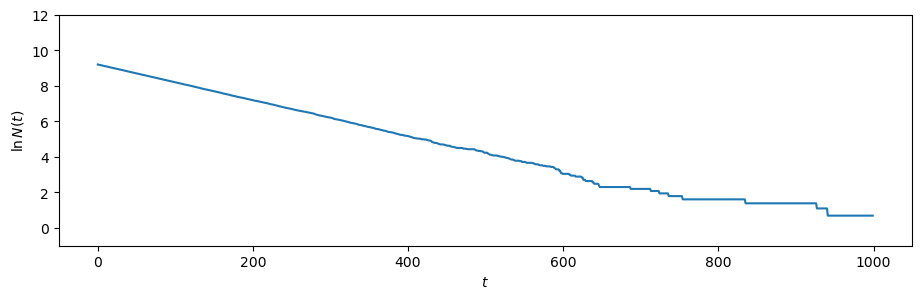

In [5]:
# Plotting

plt.figure(figsize=(11,3))

plt.plot(t, np.log(y))

plt.xlabel(r"$t$")
plt.ylabel(r"$\ln{N(t)}$")

plt.ylim(-1, 12)
plt.show()

### Exponential decay law:

In [6]:
# Lambda function

n_t = lambda x: np.log(n_max*np.exp(-lambda1*x))

# Evaluate the function in t

y_exp = n_t(t)


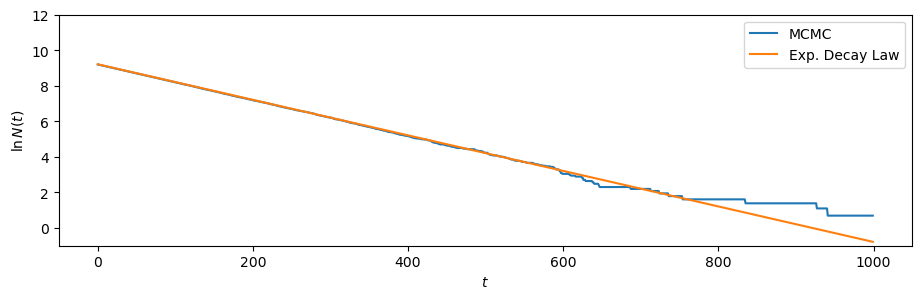

In [7]:
# Plotting

plt.figure(figsize=(11,3))

plt.plot(t, np.log(y), label = "MCMC")
plt.plot(t, y_exp, label = "Exp. Decay Law")

plt.xlabel(r"$t$")
plt.ylabel(r"$\ln{N(t)}$")

plt.ylim(-1, 12)

plt.legend()
plt.show()


### Improved code with arrays instead of nested for loops:

In [8]:
# Zero matrices for t and y
y1 = np.zeros(time_max)
t1 = np.arange(time_max)

# Initialise the atoms
atoms = np.ones(n_max)

# Time evolution
for time in range(time_max):

    # Generate the random #'s
    decay_prob = np.random.random(n_max)
    
    # Assess which atoms decay
    decay_atom = decay_prob < lambda1

    # Add the beep (try only with small n_max)
    #if np.any(decay_prob):
    #    os.system('say "Decayed."')

    # Update the atom states
    atoms[decay_atom] = 0

    # Count the atoms remaining
    y1[time] = np.sum(atoms)


/var/folders/lk/z3g6vdb52msdt9x8k77krt080000gn/T/ipykernel_13641/3769064532.py:6: RuntimeWarning: divide by zero encountered in log
  plt.plot(t1, np.log(y1), label = "MCMC (new)")


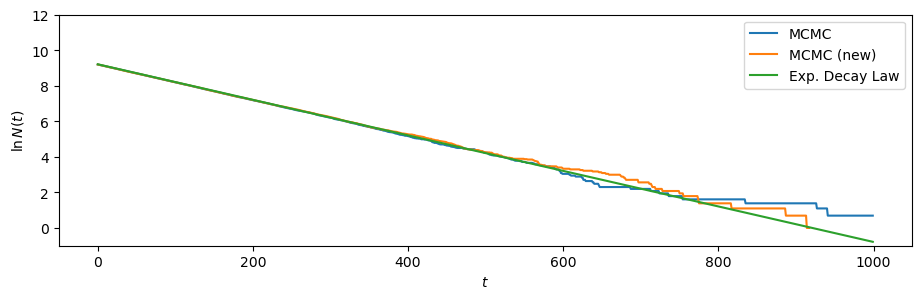

In [9]:
# Plotting

plt.figure(figsize=(11,3))

plt.plot(t, np.log(y), label = "MCMC")
plt.plot(t1, np.log(y1), label = "MCMC (new)")
plt.plot(t, y_exp, label = "Exp. Decay Law")

plt.xlabel(r"$t$")
plt.ylabel(r"$\ln{N(t)}$")

plt.ylim(-1, 12)

plt.legend()
plt.show()
